<a href="https://colab.research.google.com/github/BatuhanBilgili/Pandas_DataReader/blob/main/Data_Viziulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()
import pandas as pd

symbol = 'AMZN'
data_source='google'
start_date = '2008-01-01'
end_date = '2023-01-01'
df = data.get_data_yahoo(symbol, start_date, end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,4.7675,4.8715,4.7350,4.8125,4.8125,277174000
2008-01-03,4.8030,4.8625,4.7260,4.7605,4.7605,182450000
2008-01-04,4.6630,4.6700,4.4250,4.4395,4.4395,205400000
2008-01-07,4.4310,4.5285,4.2735,4.4410,4.4410,199632000
2008-01-08,4.3775,4.5915,4.3465,4.3940,4.3940,245666000


In [35]:
df = df["Close"]
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

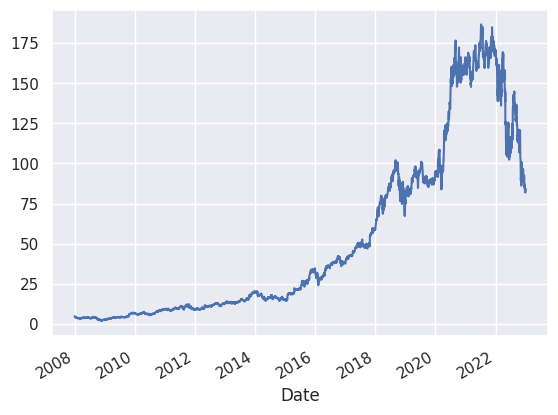

In [36]:
df.plot();

In [37]:
# Son değerleri neler bakalım.
df.tail()

Date
2022-12-23    85.250000
2022-12-27    83.040001
2022-12-28    81.820000
2022-12-29    84.180000
2022-12-30    84.000000
Name: Close, dtype: float64

In [38]:
# Ortalamasına bakalım.
df.mean()

51.56127305538338

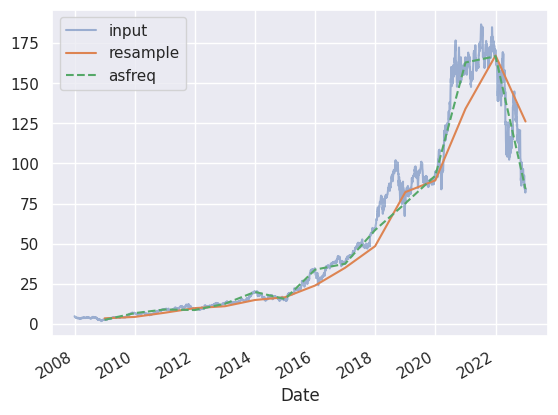

In [39]:
# Frekansları Örnekleme ve Dönüştürme
df.plot(alpha=0.5, style='-')
df.resample('BA').mean().plot(style='-')
df.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
            loc='upper left');

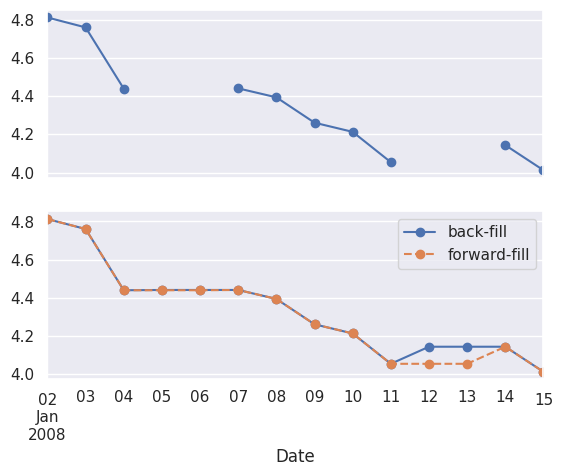

In [40]:
fig, ax = plt.subplots(2, sharex=True)
data = df.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);
# İleri doldurma ile geri doldurma arasındaki farklılıklar aşağıdaki tabloda.

In [41]:
'''
Üst panel varsayılan olarak iş günü olmayan günler NA(boş) değerleri olarak bırakılır 
ve çizimde görünmezler. Alt panel boşlukları doldurma stratejileri olan 
ileri doldurma ve geri doldurma arasındaki farkları gösterir.
'''

'\nÜst panel varsayılan olarak iş günü olmayan günler NA(boş) değerleri olarak bırakılır \nve çizimde görünmezler. Alt panel boşlukları doldurma stratejileri olan \nileri doldurma ve geri doldurma arasındaki farkları gösterir.\n'

<ipython-input-42-024036d77913>:11: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(900).plot(ax=ax[2])


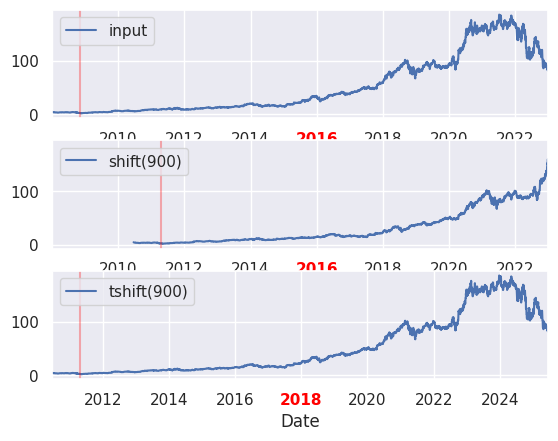

In [42]:
# Zaman Kaymaları
# Burada hem shift() hem de tsift() yöntemlerini 900 gün kaydıracağız:

fig, ax = plt.subplots(3, sharey=True)

# verilere bir frekans uygulayın.
df = df.asfreq('D', method='pad')

df.plot(ax=ax[0])
df.shift(900).plot(ax=ax[1])
df.tshift(900).plot(ax=ax[2])

# efsaneler ve ek açıklamalar
local_max = pd.to_datetime("2008-11-05")
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red');

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red');

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[4].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

<ipython-input-43-60dcd7051f41>:3: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (df.tshift(-365) / df - 1)


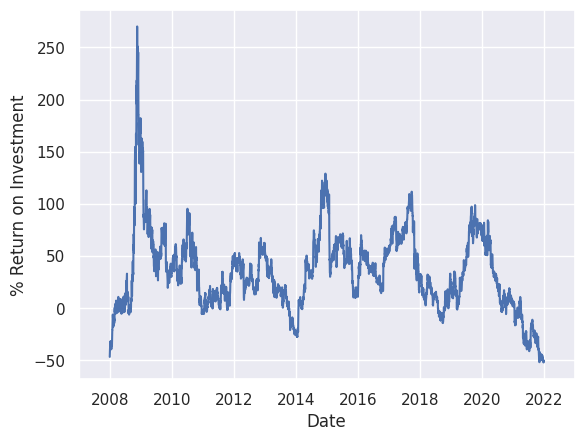

In [43]:
# Amazon hisse senedi için veri kümesi boyunca bir yıllık yatırım getirisi hesaplamak

ROI = 100 * (df.tshift(-365) / df - 1)
ROI.plot()
plt.ylabel('% Return on Investment'); 

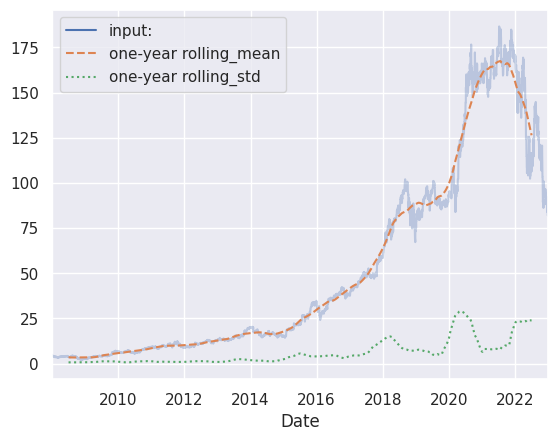

In [46]:
# Rolling windows
# Amazon hisse senedi hakkında hareketli istatistikler
rolling = df.rolling(365, center=True)

data = pd.DataFrame({'input:': df,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [52]:
# Seattle Bisiklet sayılarının verilerini indirmek için;
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2836k    0 2836k    0     0  1309k      0 --:--:--  0:00:02 --:--:-- 1309k


In [55]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [57]:
data.columns = ['Total', 'East', 'West']

Date
2008-01-02    4.8125
2008-01-03    4.7605
2008-01-04    4.4395
2008-01-05    4.4395
2008-01-06    4.4395
Freq: D, Name: Close, dtype: float64

In [58]:
data.dropna().describe()

,Total,East,West
count,91210.000000,91210.000000,91210.000000
mean,105.603859,47.193882,58.409977
std,133.270779,60.779588,82.619206
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,58.000000,26.000000,30.000000
75%,142.000000,65.000000,75.000000
max,1097.000000,698.000000,850.000000


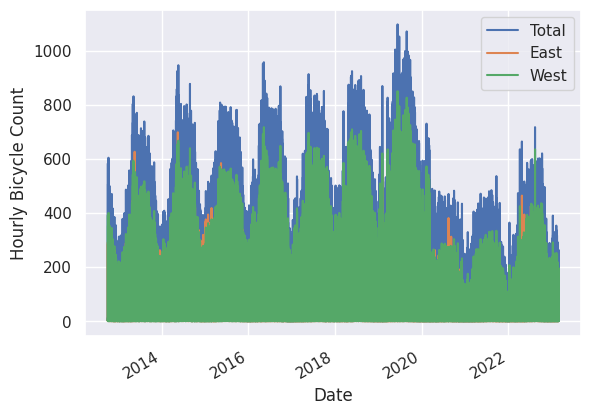

In [59]:
# Verileri Görselleştirme

%matplotlib inline
import seaborn; seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle Count");

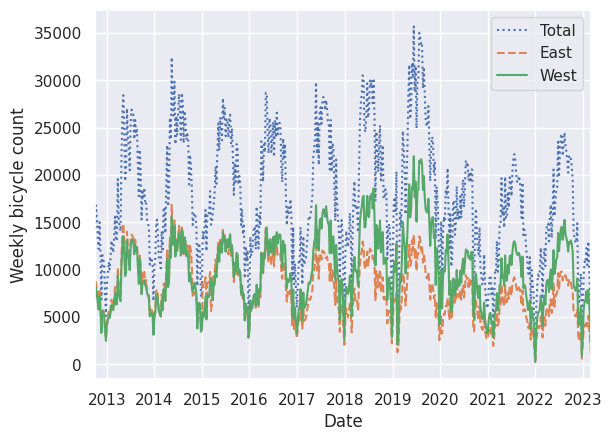

In [60]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

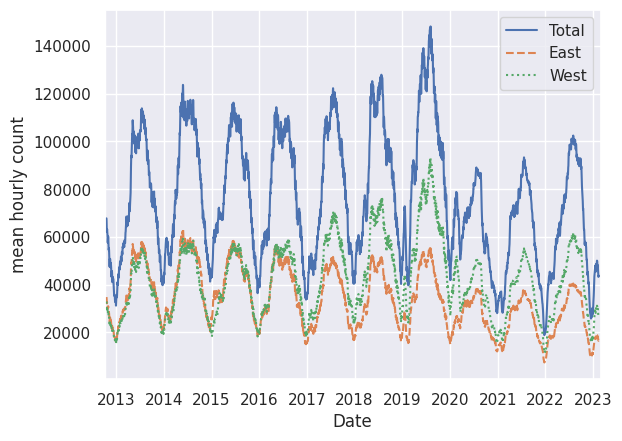

In [61]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', '--', ':'])
plt.ylabel('mean hourly count');

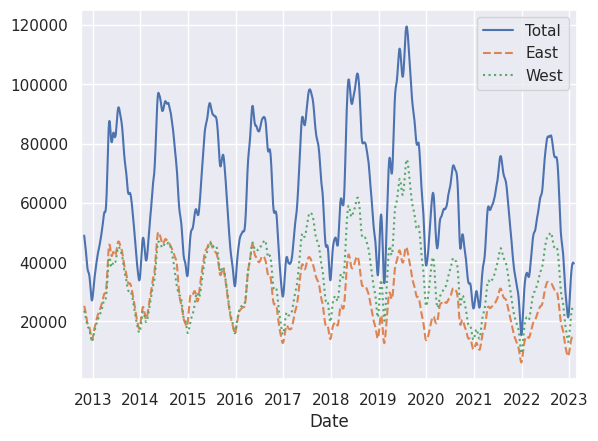

In [62]:
daily.rolling(50, center=True,
              win_type="gaussian").sum(std=10).plot(style=['-', '--', ':']);

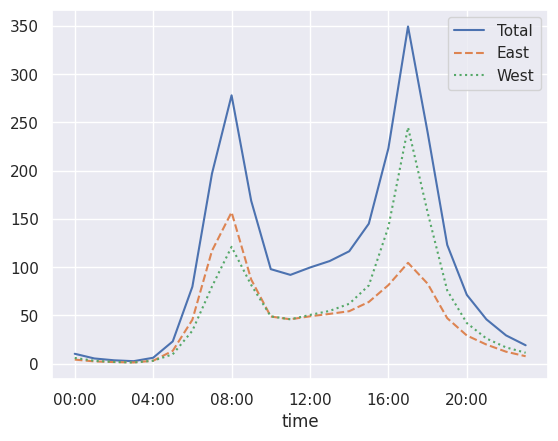

In [64]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', '--', ':']);


<Axes: >

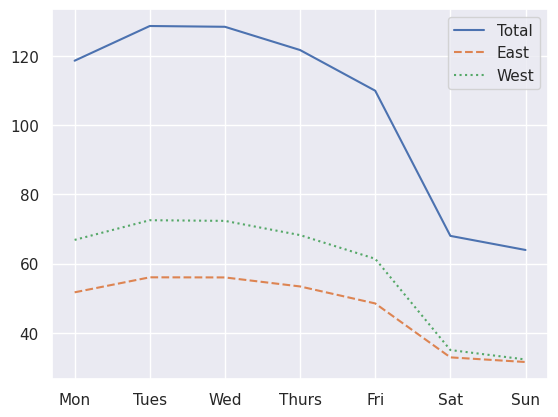

In [65]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', '--', ':'])